# <center> Assignment 2 </center>

#### Name: Yousef EL-Qawasmi

#### Student ID: 190615960

You are given a training set and the description of the features. Please implement the following requirements. You can use the sklearn or other python packages. 

Ref: https://scikit-learn.org/stable/modules/tree.html

Submit the ipynb file ONLY.

### Question 1. The data set has missing values shown as "?". Please show the percentage of missing values for each feature, and the handling strategies  (i.e.  use median to impute continuous features, and mode to impute categorical featues).

In [1]:
import numpy as np 
import pandas as pd

headers = ["Gender", "Symptoms", "Alcohol","Hepatitis B Surface Antigen","Hepatitis B e Antigen","Hepatitis B Core Antibody","Hepatitis C Virus Antibody","Cirrhosis","Endemic Countries","Smoking","Diabetes","Obesity","Hemochromatosis","Arterial Hypertension","Chronic Renal Insufficiency","Human Immunodeficiency Virus","Nonalcoholic Steatohepatitis","Esophageal Varices","Splenomegaly","Portal Hypertension","Portal Vein Thrombosis","Liver Metastasis","Radiological Hallmark","Age at diagnosis","Grams of Alcohol per day","Packs of cigarets per year","Performance Status","Encefalopathy degree","Ascites degree","International Normalised Ratio","Alpha-Fetoprotein","Haemoglobin","Mean Corpuscular Volume","Leukocytes","Platelets","Albumin","Total Bilirubin","Alanine transaminase","Aspartate transaminase","Gamma glutamyl transferase","Alkaline phosphatase","Total Proteins","Creatinine","Number of Nodules","Major dimension of nodule","Direct Bilirubin","Iron","Oxygen Saturation","Ferritin","Class"]

varsCat = ["Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Mode","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Median","Mode"]

r_line= []
with open('train.txt','r') as r:
    for line in r:
        l = line.rstrip()
        r_line.append(l.split(","))
df = pd.DataFrame(data=r_line, index=[y for y in range(len(r_line))], columns=[x for x in range(50)])
df = df.replace("?",np.nan)
df.columns = headers

flag = 0 
for column in df.columns:
	val = df[column].isnull().sum()
	perc = val / df.shape[0] * 100
	print('> %s, \tMissing: %d (%.2f%%) \tImputation Mode: %s' % (headers[flag], val, perc, varsCat[flag]))
	flag+=1

flag = 0
for column in df.columns:
	if(varsCat[flag] == "Median" and df[column].isnull().any()):
		df[column] = df[column].fillna(df[column].median())
	elif(varsCat[flag] == "Mode" and df[column].isnull().any()):
		df[column] = df[column].fillna(df[column].mode()[0])
	flag+=1



> Gender, 	Missing: 0 (0.00%) 	Imputation Mode: Mode
> Symptoms, 	Missing: 18 (10.91%) 	Imputation Mode: Mode
> Alcohol, 	Missing: 0 (0.00%) 	Imputation Mode: Mode
> Hepatitis B Surface Antigen, 	Missing: 17 (10.30%) 	Imputation Mode: Mode
> Hepatitis B e Antigen, 	Missing: 39 (23.64%) 	Imputation Mode: Mode
> Hepatitis B Core Antibody, 	Missing: 24 (14.55%) 	Imputation Mode: Mode
> Hepatitis C Virus Antibody, 	Missing: 9 (5.45%) 	Imputation Mode: Mode
> Cirrhosis, 	Missing: 0 (0.00%) 	Imputation Mode: Mode
> Endemic Countries, 	Missing: 39 (23.64%) 	Imputation Mode: Mode
> Smoking, 	Missing: 41 (24.85%) 	Imputation Mode: Mode
> Diabetes, 	Missing: 3 (1.82%) 	Imputation Mode: Mode
> Obesity, 	Missing: 10 (6.06%) 	Imputation Mode: Mode
> Hemochromatosis, 	Missing: 23 (13.94%) 	Imputation Mode: Mode
> Arterial Hypertension, 	Missing: 3 (1.82%) 	Imputation Mode: Mode
> Chronic Renal Insufficiency, 	Missing: 2 (1.21%) 	Imputation Mode: Mode
> Human Immunodeficiency Virus, 	Missing: 14 (8.4

### Question 2. Impute the missing values, and use the data to train an ID3 decision tree using information gain. Please show the tree structure.

[Text(169.6419642857143, 205.35999999999999, 'X[40] <= 168.0\nentropy = 0.959\nsamples = 165\nvalue = [63, 102]'),
 Text(71.74285714285715, 181.2, 'X[46] <= 73.5\nentropy = 0.722\nsamples = 90\nvalue = [18, 72]'),
 Text(47.82857142857143, 157.04, 'X[48] <= 280.5\nentropy = 0.993\nsamples = 20\nvalue = [11, 9]'),
 Text(35.871428571428574, 132.88, 'X[37] <= 26.0\nentropy = 0.811\nsamples = 12\nvalue = [3, 9]'),
 Text(23.914285714285715, 108.72, 'X[48] <= 23.0\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(11.957142857142857, 84.56, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(35.871428571428574, 84.56, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(47.82857142857143, 108.72, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(59.785714285714285, 132.88, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(95.65714285714286, 157.04, 'X[48] <= 1149.0\nentropy = 0.469\nsamples = 70\nvalue = [7, 63]'),
 Text(83.7, 132.88, 'X[23] <= 70.5\nentropy = 0.326\nsamples = 67\n

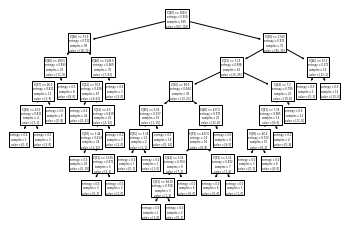

In [2]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

df = df.astype(float)
predictors = df.to_numpy()
target = predictors[:,49].flatten()
predictors = predictors[:,0:49]

clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(predictors,target)
tree.plot_tree(clf)